In [1]:
import re
import urllib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords # Import the stop word list

def review_to_words( raw_review ):
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops]   
    return( " ".join( meaningful_words ))   

train_df = pd.read_table('train.tsv')
# train_df["Phrase"] = train_df["Phrase"].apply(review_to_words)
test_df = pd.read_table('test.tsv')

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(train_df.Phrase)

vectorizer.get_feature_names()

[u'000',
 u'10',
 u'100',
 u'101',
 u'102',
 u'103',
 u'104',
 u'105',
 u'10th',
 u'11',
 u'110',
 u'112',
 u'12',
 u'120',
 u'127',
 u'129',
 u'12th',
 u'13',
 u'13th',
 u'14',
 u'140',
 u'146',
 u'15',
 u'15th',
 u'16',
 u'163',
 u'168',
 u'170',
 u'1790',
 u'18',
 u'1899',
 u'19',
 u'1915',
 u'1920',
 u'1930s',
 u'1933',
 u'1937',
 u'1938',
 u'1940s',
 u'1950',
 u'1950s',
 u'1952',
 u'1953',
 u'1957',
 u'1958',
 u'1959',
 u'1960',
 u'1960s',
 u'1962',
 u'1970',
 u'1970s',
 u'1971',
 u'1972',
 u'1973',
 u'1975',
 u'1979',
 u'1980',
 u'1980s',
 u'1984',
 u'1986',
 u'1987',
 u'1989',
 u'1990',
 u'1991',
 u'1992',
 u'1993',
 u'1994',
 u'1995',
 u'1997',
 u'1998',
 u'1999',
 u'19th',
 u'20',
 u'2000',
 u'2001',
 u'2002',
 u'20th',
 u'21',
 u'21st',
 u'22',
 u'24',
 u'2455',
 u'25',
 u'26',
 u'270',
 u'295',
 u'30',
 u'300',
 u'3000',
 u'30s',
 u'37',
 u'3d',
 u'40',
 u'40s',
 u'42',
 u'451',
 u'48',
 u'4ever',
 u'4th',
 u'4w',
 u'50',
 u'500',
 u'50s',
 u'51',
 u'51st',
 u'52',
 u'53',
 

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB

X = vectorizer.transform(train_df.Phrase)
y = train_df.Sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
# model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.57356145072408049

In [11]:
stops = set(stopwords.words("english"))                  
print stops

set([u'all', u'just', u'being', u'over', u'both', u'through', u'yourselves', u'its', u'before', u'herself', u'had', u'should', u'to', u'only', u'under', u'ours', u'has', u'do', u'them', u'his', u'very', u'they', u'not', u'during', u'now', u'him', u'nor', u'did', u'this', u'she', u'each', u'further', u'where', u'few', u'because', u'doing', u'some', u'are', u'our', u'ourselves', u'out', u'what', u'for', u'while', u'does', u'above', u'between', u't', u'be', u'we', u'who', u'were', u'here', u'hers', u'by', u'on', u'about', u'of', u'against', u's', u'or', u'own', u'into', u'yourself', u'down', u'your', u'from', u'her', u'their', u'there', u'been', u'whom', u'too', u'themselves', u'was', u'until', u'more', u'himself', u'that', u'but', u'don', u'with', u'than', u'those', u'he', u'me', u'myself', u'these', u'up', u'will', u'below', u'can', u'theirs', u'my', u'and', u'then', u'is', u'am', u'it', u'an', u'as', u'itself', u'at', u'have', u'in', u'any', u'if', u'again', u'no', u'when', u'same', u'

In [33]:
result = clf.predict(vectorizer.transform(test_df.Phrase))

# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
output = pd.DataFrame(data={"PhraseId":test_df["PhraseId"], "Sentiment":result})
output.to_csv( "ZG_rotten_tomatoes_model2.csv", index=False, quoting=3 )
output

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3
5,156066,3
6,156067,3
7,156068,3
8,156069,3
9,156070,2


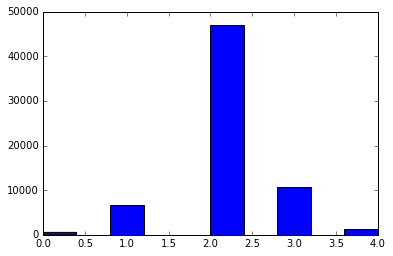

 0 0.00811560972666
1 0.0994086767634
2 0.709497375249
3 0.163141857238
4 0.0198364810234


In [31]:
%matplotlib inline

plt.hist(output.Sentiment)
plt.show()
for i in range(0, 5):
    print i, len(output[output.Sentiment == i]) / float(len(output))